# Step A - Multiple Product Detection

Test on scene image: {e1.png, e2.png, e3.png, e4.png, e5.png} 
Use product images: {0.jpg, 1.jpg, 11.jpg, 19.jpg, 24.jpg, 26.jpg, 25.jpg}

Develop an object detection system to identify single instance of products given: one reference image for each item and a scene image. The system should be able to correctly identify all the product in the shelves image. One way to solve this task could be the use of local invariant feature as explained in lab session 5.

In [607]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [608]:
img1 = cv2.imread('models/0.jpg', cv2.IMREAD_GRAYSCALE) #queryImage
print("Shape Image1 :", image1.shape)
img2 = cv2.imread('scenes/e1.png', cv2.IMREAD_GRAYSCALE) #trainImage
print("Saphe Image2 :",image2.shape)

Shape Image1 : (1500, 1105, 3)
Saphe Image2 : (458, 627, 3)


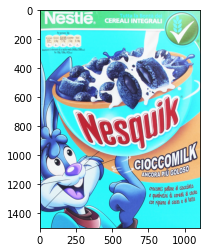

In [609]:
plt.imshow(image1)
plt.show()

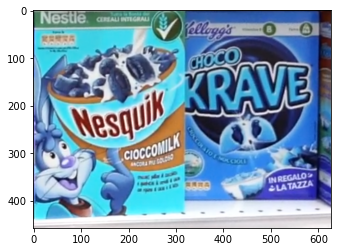

In [610]:
plt.imshow(image2)
plt.show()

### Brute-Force Matching with ORB Descriptors

In [611]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [612]:
des1.shape

(500, 32)

In [613]:
img1.shape

(1500, 1105)

In [614]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [615]:
# Match descriptors.
matches = bf.match(des1,des2)

In [616]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

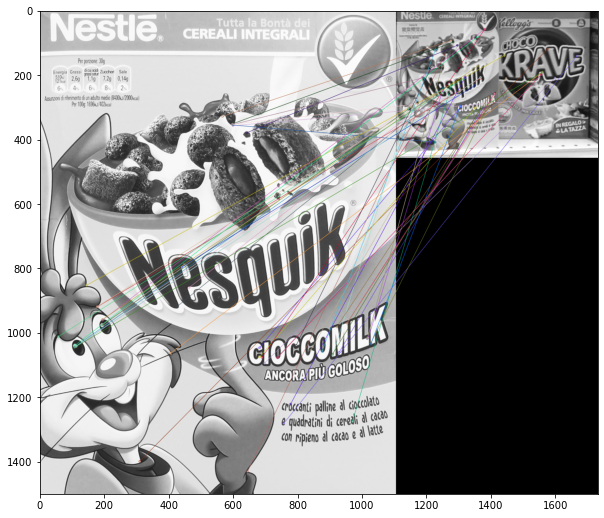

In [617]:
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure( figsize=(10,10))
plt.imshow(img3)
plt.show()

### Brute-Force Matching with SIFT Descriptors and Ratio Test

In [618]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

In [619]:
# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

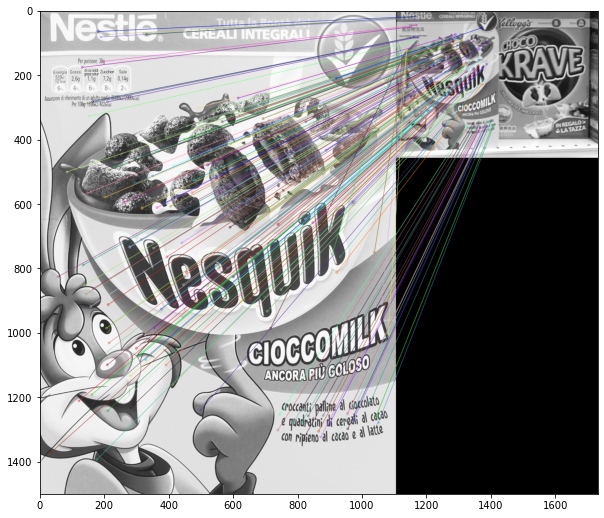

In [620]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.show()

In [621]:
good[187][0].trainIdx

120

In [622]:
len(kp2)

2164

In [623]:
# Apply goof matches to keypoints
good_kp = []
for m in good:
    good_kp.append(kp2[m[0].trainIdx])

In [624]:
len(good_kp)

188

In [625]:
len(good)

188

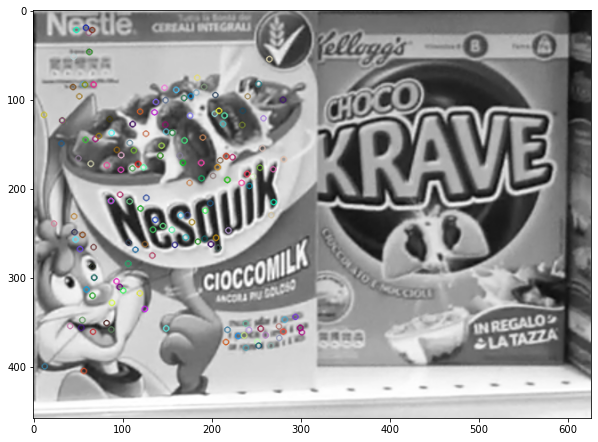

In [626]:

img2_with_good_keypoints = cv2.drawKeypoints(img2,good_kp,img2)

plt.figure(figsize=(10,10))
plt.imshow(img2_with_good_keypoints)
plt.show()

In [627]:
good_kp[0].pt

(12.677209854125977, 399.5285339355469)

In [628]:
all_pts_x = np.array([kp.pt[0] for kp in good_kp])
all_pts_y = np.array([kp.pt[1] for kp in good_kp])

In [629]:
x_min = all_pts_x.min()
x_max = all_pts_x.max()
y_min = all_pts_y.min()
y_max = all_pts_y.max()

In [630]:
x_min

11.938119888305664

In [631]:
pts = np.array([[x_min, y_min],
               [x_min, y_max],
                [x_max, y_max],
               [x_max, y_min]], dtype=int)
pts

array([[ 11,  19],
       [ 11, 404],
       [301, 404],
       [301,  19]])

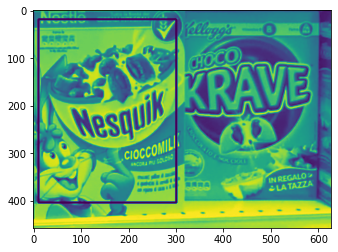

In [632]:
img2_with_draw = cv2.polylines(img2, [pts], 
                      isClosed=True, color=(0,255,0), thickness=4)
plt.imshow(img2_with_draw)
plt.show()

---------

In [633]:
image = cv2.imread('scenes/e1.png')
image.shape

(458, 627, 3)

In [634]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

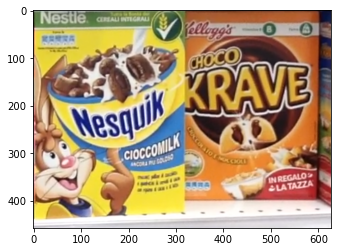

In [635]:
plt.imshow(image_rgb)

In [636]:
points = np.array([[0,0],[0,450],[300,450], [300,0]])
points

array([[  0,   0],
       [  0, 450],
       [300, 450],
       [300,   0]])

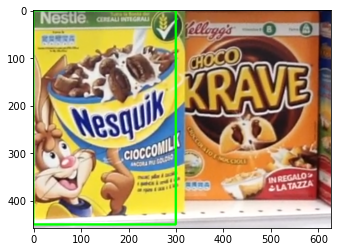

In [637]:

  
# Using cv2.polylines() method
imagewithdraw = cv2.polylines(image_rgb, [points], 
                      isClosed=True, color=(0,255,0), thickness=4)
plt.imshow(imagewithdraw)
plt.show()

______

In [638]:
img1 = cv2.imread('scenes/e1.png', cv2.IMREAD_GRAYSCALE)
img1.shape

(458, 627)

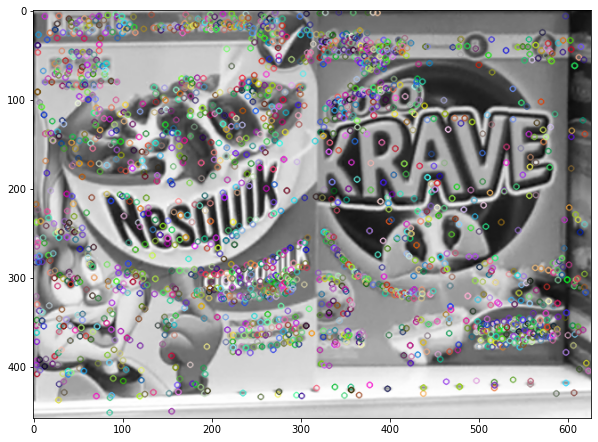

2164
2164


In [639]:
# plot keypoints
sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(img1, None)
img_with_keypoints = cv2.drawKeypoints(img1,keypoints,img1)

plt.figure(figsize=(10,10))
plt.imshow(img_with_keypoints)
plt.show()

print(len(keypoints))
print(len(descriptors))

In [640]:
descriptors.shape

(2164, 128)